In [2]:
import os, json
import numpy as np
import pandas as pd
from sklearn import metrics, preprocessing, cross_validation
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

from nolearn.lasagne import NeuralNet
import lasagne
import theano
import theano.tensor as T

import xgboost as xgb

%matplotlib inline

In [ ]:
theano.config.openmp

In [3]:
train_dat = pd.read_csv('train_parsed.csv')
test_dat = pd.read_csv('test_parsed.csv')
train_labels = np.load('train_labels_parsed.npy')

In [3]:
train_dat = pd.read_csv('features/zeros_ones_train.csv')
test_dat = pd.read_csv('features/zeros_ones_test.csv')
train_labels = np.load('features/train_labels.npy')

In [9]:
train_dat = pd.read_csv('features/cat_sums_train.csv')
test_dat = pd.read_csv('features/cat_sums_test.csv')

train_labels = np.load('features/train_labels.npy')

In [10]:
n_features = len(train_dat.columns)
n_classes = 2

X = train_dat.as_matrix().astype(np.float32)
scalar = preprocessing.StandardScaler()
X = scalar.fit_transform(X)

Y = train_labels.astype(np.int32)

X_test = test_dat.as_matrix().astype(np.float32)

dev_cutoff = int( len( train_dat )*0.90 )

In [11]:
def new_nn02():
    layers = [
            ('input', lasagne.layers.InputLayer),
            ('dense0', lasagne.layers.DenseLayer),
            ('dropout0', lasagne.layers.DropoutLayer),
            ('dense1', lasagne.layers.DenseLayer),
            #('dropout1', lasagne.layers.DropoutLayer),
            ('dense2', lasagne.layers.DenseLayer),
            ('dense3', lasagne.layers.DenseLayer),
            ('output', lasagne.layers.DenseLayer)
        ]
    
    network = NeuralNet(layers=layers,
                     input_shape=(None, n_features),
                     dense0_num_units=128,
                     dropout0_p=0.2,
                     dense1_num_units=64,
                     #dropout1_p=0.1,
                     dense2_num_units=32,
                     dense3_num_units=16,
                     output_num_units=n_classes,
                     output_nonlinearity=lasagne.nonlinearities.softmax,
                     update=lasagne.updates.adagrad,
                     update_learning_rate=0.04,
                     eval_size=0.0,
                     # objective_loss_function = binary_accuracy,
                     verbose=1,
                     max_epochs=1)
    return network

def new_nn04():
    layers = [
            ('input', lasagne.layers.InputLayer),
            ('dense0', lasagne.layers.DenseLayer),
            ('dropout0', lasagne.layers.DropoutLayer),
            ('dense1', lasagne.layers.DenseLayer),
            ('dropout1', lasagne.layers.DropoutLayer),
            ('dense2', lasagne.layers.DenseLayer),
            ('dense3', lasagne.layers.DenseLayer),
            ('output', lasagne.layers.DenseLayer)
        ]
    
    network = NeuralNet(layers=layers,
                     input_shape=(None, n_features),
                     dense0_num_units=512,
                     dropout0_p=0.4,
                     dense1_num_units=128,
                     dropout1_p=0.1,
                     dense2_num_units=64,
                     dense3_num_units=16,
                     output_num_units=n_classes,
                     output_nonlinearity=lasagne.nonlinearities.softmax,
                     update=lasagne.updates.adagrad,
                     update_learning_rate=0.02,
                     #train_split=0.0,
                     # objective_loss_function = binary_accuracy,
                     verbose=1,
                     max_epochs=1)
    return network

def new_nn05():
    layers = [
            ('input', lasagne.layers.InputLayer),
            ('dense0', lasagne.layers.DenseLayer),
            ('dropout0', lasagne.layers.DropoutLayer),
            ('dense1', lasagne.layers.DenseLayer),
            #('dropout1', lasagne.layers.DropoutLayer),
            #('dense2', lasagne.layers.DenseLayer),
            #('dense3', lasagne.layers.DenseLayer),
            ('output', lasagne.layers.DenseLayer)
        ]
    
    network = NeuralNet(layers=layers,
                     input_shape=(None, n_features),
                     dense0_num_units=256,
                     dropout0_p=0.3,
                     dense1_num_units=128,
                     #dropout1_p=0.1,
                     #dense2_num_units=64,
                     #dense3_num_units=16,
                     output_num_units=n_classes,
                     output_nonlinearity=lasagne.nonlinearities.softmax,
                     update=lasagne.updates.adagrad,
                     update_learning_rate=0.02,
                     #train_split=0.0,
                     # objective_loss_function = binary_accuracy,
                     verbose=1,
                     max_epochs=1)
    return network

In [12]:
-

Fold 1 of 3
# Neural Network with 112002 learnable parameters

## Layer information

  #  name        size
---  --------  ------
  0  input        307
  1  dense0       256
  2  dropout0     256
  3  dense1       128
  4  output         2

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       0.26018       0.19689      1.32149      0.91450  10.62s
      2       0.19243       0.19001      1.01273      0.91626  10.52s
      3       0.18317       0.18755      0.97665      0.91756  10.75s
      4       0.17887       0.18689      0.95705      0.91807  10.53s
      5       0.17527       0.18632      0.94067      0.91820  10.53s
      6       0.17291       0.18560      0.93158      0.91885  10.57s
      7       0.17014       0.18553      0.91702      0.91871  10.51s
      8       0.16733       0.18533      0.90292      0.91894  10.68s
      9       0.16543       0.18603      0.88925      0.91887  

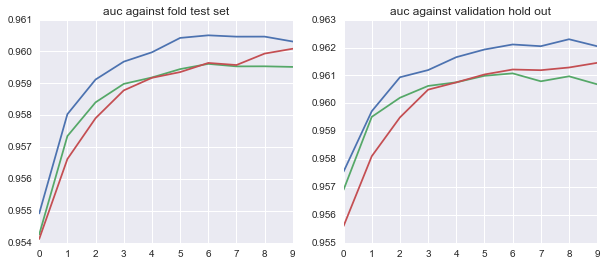

In [13]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('auc against fold test set')
plt.plot(auc_cv_scores.T)
plt.subplot(1,2,2)
plt.title('auc against validation hold out')
plt.plot(auc_val_scores.T)
plt.show()

In [26]:
print(fold_scores)
pred = np.round(X_val_pred[:,2])
metrics.roc_auc_score(Y[dev_cutoff:],X_val_pred.mean(1))

[ 0.96227365  0.96106107  0.96204124]


0.96306718149733206

### Load networks from files

In [27]:
networks = []

for root, dirs, files in os.walk('nn_model/'):
    for file in files:
        if file.endswith(".param") and file.startswith('nn05'):#not file.startswith('fengineer'):
            network = new_nn05()
            network.load_params_from(os.path.join(root, file))
            networks.append(network)

Loaded parameters to layer 'dense0' (shape 299x256).
Loaded parameters to layer 'dense0' (shape 256).
Loaded parameters to layer 'dense1' (shape 256x128).
Loaded parameters to layer 'dense1' (shape 128).
Loaded parameters to layer 'output' (shape 128x2).
Loaded parameters to layer 'output' (shape 2).
Loaded parameters to layer 'dense0' (shape 299x256).
Loaded parameters to layer 'dense0' (shape 256).
Loaded parameters to layer 'dense1' (shape 256x128).
Loaded parameters to layer 'dense1' (shape 128).
Loaded parameters to layer 'output' (shape 128x2).
Loaded parameters to layer 'output' (shape 2).
Loaded parameters to layer 'dense0' (shape 299x256).
Loaded parameters to layer 'dense0' (shape 256).
Loaded parameters to layer 'dense1' (shape 256x128).
Loaded parameters to layer 'dense1' (shape 128).
Loaded parameters to layer 'output' (shape 128x2).
Loaded parameters to layer 'output' (shape 2).


### Predict each model

In [28]:
train_preds = np.zeros( (len(X), len(networks)) )
test_preds = np.zeros( (len(X_test), len(networks)) )
for i, network in enumerate(networks):
    train_preds[:,i] = network.predict(X)
    test_preds[:,i] = network.predict(X_test)
    print('Model {}:'.format(i),metrics.roc_auc_score(Y, train_preds[:,i]))
train_pred_mean = train_preds.mean(1)
test_pred_mean = test_preds.mean(1)
print('Mean of models', metrics.roc_auc_score(Y, train_pred_mean))

Model 0: 0.818475816522
Model 1: 0.823650188671
Model 2: 0.822475773245
Mean of models 0.843092620371


In [29]:
xg_train = xgb.DMatrix(train_preds[:dev_cutoff], label=Y[:dev_cutoff])
xg_valid = xgb.DMatrix(train_preds[dev_cutoff:], label=Y[dev_cutoff:])
xg_test = xgb.DMatrix(test_preds)

num_round=400
param = {   'objective': 'binary:logistic',
            'eval_metric': 'auc',
            'nthread':4,
            'max_depth':6,
            'colsample_bytree':1.0,
            'subsample':1.0,
            'min_child_weight':2, #3,
            'eta':0.3 #0.023,
        }

watchlist = [(xg_train,'train'), (xg_valid,'test')]
bst = xgb.train(param, xg_train, num_round, watchlist,
                early_stopping_rounds=50)

Will train until test error hasn't decreased in 50 rounds.
[0]	train-auc:0.843755	test-auc:0.837163
[1]	train-auc:0.843755	test-auc:0.837163
[2]	train-auc:0.843755	test-auc:0.837163
[3]	train-auc:0.843755	test-auc:0.837163
[4]	train-auc:0.843755	test-auc:0.837163
[5]	train-auc:0.843755	test-auc:0.837163
[6]	train-auc:0.843755	test-auc:0.837163
[7]	train-auc:0.843755	test-auc:0.837163
[8]	train-auc:0.843755	test-auc:0.837163
[9]	train-auc:0.843755	test-auc:0.837163
[10]	train-auc:0.843755	test-auc:0.837163
[11]	train-auc:0.843755	test-auc:0.837163
[12]	train-auc:0.843755	test-auc:0.837163
[13]	train-auc:0.843755	test-auc:0.837163
[14]	train-auc:0.843755	test-auc:0.837163
[15]	train-auc:0.843755	test-auc:0.837163
[16]	train-auc:0.843755	test-auc:0.837163
[17]	train-auc:0.843755	test-auc:0.837163
[18]	train-auc:0.843755	test-auc:0.837163
[19]	train-auc:0.843755	test-auc:0.837163
[20]	train-auc:0.843755	test-auc:0.837163
[21]	train-auc:0.843755	test-auc:0.837163
[22]	train-auc:0.843755	tes

In [90]:
#pred = bst.predict(xg_test)
pred = test_pred_mean
sample = pd.read_csv('sample_submission.csv')
sample.QuoteConversion_Flag = pred
sample.to_csv('nn_submission_02.csv', index=False)

In [91]:
pred

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])